## Analysing The Gap Between Critical and User Video Game Reviews: Call of Duty
The video game industry is in a sorry state in the year 2025, I'm sure most players would agree. In August of 2024, PlayStation's big block-buster hero shooter Concord was met with overwhelmingly negative user reviews, low sales, and mass ridicule, putting PlayStation $400 million in the hole and ultimately resulting in the game being taken offline within just two weeks of launch. But despite universal clapback from gamers, critical reviews on Metacritic place Concord with a score of 62 on PS5, suggesting this game is about average. However, Concord has been described as one of the worst video games ever, reflected in a measly 1.7 user score... How and why does a discrepancy of this magnitude occur?

Some other examples include:
- Dustborn (68 vs. 1.1)
- Unknown 9: Awakening (59 vs. 1.7)
- Suicide Squad: Kill The Justice League (60 vs. 3.4)
- Star Wars Outlaws (75 vs. 5.3)
- Skull and Bones (59 vs. 3.4)

To understand this widening of critical opinion, I'm going to conduct a limited analysis on one of the most recognisable IPs of the last 20 years, one of the highest grossing series of all time, and one with almost yearly releases since it's first introduction in 2003. I am of course talking about Call of Duty. With plenty of good and bad games, this series will be fantastic for investigating the trend of critical and user reviews have been over time. The data I am using includes critical and user scores for every call of duty game in the main series from 2003 to 2024, taken manually from Metacritic on 05/02/2025. I have multiplied the user scores by a factor of 10 so they are on a comparable /100 score like critical reviews.

### Data Import & Cleaning
#### Summary:
- Impute PlayStation critical and user scores for Call of Duty 2 from Xbox version,
- Impute PC scores from console average - avg difference between console and PC scores

In [1]:
import pandas as pd

# import data
df = pd.read_excel('Data\cod_reviews.xlsx')
df

,Year,Game,PC Critic,PC User,Xbox Critic,Xbox User,PlayStation Critic,PlayStation User
0,2003,Call of Duty,91.0,83.0,72,74,78.0,74.0
1,2005,Call of Duty 2,86.0,85.0,89,82,NaN,NaN
2,2006,Call of Duty 3,NaN,NaN,82,66,80.0,66.0
3,2007,Call of Duty 4: Modern Warfare,92.0,85.0,94,85,94.0,82.0
4,2008,Call of Duty: World at War,83.0,78.0,84,79,85.0,78.0
5,2009,Call of Duty: Modern Warfare 2,86.0,71.0,94,78,94.0,76.0
6,2010,Call of Duty: Black Ops,81.0,59.0,87,71,88.0,70.0
7,2011,Call of Duty: Modern Warfare 3,78.0,31.0,88,38,88.0,34.0
8,2012,Call of Duty: Black Ops II,74.0,49.0,83,59,83.0,60.0
9,2013,Call of Duty: Ghosts,68.0,23.0,78,45,71.0,44.0


The first problem arises in the fact that Call of Duty 2 did not release for the PlayStation, and Call of Duty 3 did not release for the PC, so we need to impute these values. While collecting these data points from Metacritic, I found the review scores for the Xbox and PlayStation version to be quite similar, so I suppose imputing the same value for Call of Duty (PlayStation) as the Xbox version. I will conduct analysis to verify this approach.

In [2]:
# df with na values dropped
df_drop_na = df.dropna()
df_drop_na

,Year,Game,PC Critic,PC User,Xbox Critic,Xbox User,PlayStation Critic,PlayStation User
0,2003,Call of Duty,91.0,83.0,72,74,78.0,74.0
3,2007,Call of Duty 4: Modern Warfare,92.0,85.0,94,85,94.0,82.0
4,2008,Call of Duty: World at War,83.0,78.0,84,79,85.0,78.0
5,2009,Call of Duty: Modern Warfare 2,86.0,71.0,94,78,94.0,76.0
6,2010,Call of Duty: Black Ops,81.0,59.0,87,71,88.0,70.0
7,2011,Call of Duty: Modern Warfare 3,78.0,31.0,88,38,88.0,34.0
8,2012,Call of Duty: Black Ops II,74.0,49.0,83,59,83.0,60.0
9,2013,Call of Duty: Ghosts,68.0,23.0,78,45,71.0,44.0
10,2014,Call of Duty: Advanced Warfare,78.0,48.0,81,57,83.0,58.0
11,2015,Call of Duty: Black Ops III,73.0,35.0,81,48,81.0,53.0


In [21]:
# critical scores
avg_xbox_critic = df_drop_na['Xbox Critic'].mean()
avg_playstation_critic = df_drop_na['PlayStation Critic'].mean()
print(f'AVG Critic Score (Xbox): {avg_xbox_critic:.2f}')
print(f'avg Critic Score (PlayStation): {avg_playstation_critic:.2f}')

# user scores
avg_xbox_user = df_drop_na['Xbox User'].mean()
avg_playstation_user = df_drop_na['PlayStation User'].mean()
print(f'\nAVG User Score (Xbox): {avg_xbox_user:.2f}')
print(f'AVG User Score (PlayStation): {avg_playstation_user:.2f}')

AVG Critic Score (Xbox): 80.84
avg Critic Score (PlayStation): 80.37

AVG User Score (Xbox): 55.47
AVG User Score (PlayStation): 54.37


It is startling how little the review scores differ on average between PlayStation and Xbox, with only 0.47 difference across 19 data points! The same goes for the difference in user reviews, but even more interesting is the fact we can already see the disconnect between critical reviews and the user experience.

Anyway, this validates my decision to impute the xbox score for the PlayStation version of Call of Duty 2.

In [4]:
# impute call of duty 2 scores
df.loc[df['Game'] == 'Call of Duty 2', 'PlayStation Critic'] = df.loc[df['Game'] == 'Call of Duty 2', 'Xbox Critic']
df.loc[df['Game'] == 'Call of Duty 2', 'PlayStation User'] = df.loc[df['Game'] == 'Call of Duty 2', 'Xbox User']
df.loc[df['Game'] == 'Call of Duty 2']

,Year,Game,PC Critic,PC User,Xbox Critic,Xbox User,PlayStation Critic,PlayStation User
1,2005,Call of Duty 2,86.0,85.0,89,82,89.0,82.0


With the scores imputed for Call of Duty 2, we still need to impute the scores for Call of Duty 3 on the PC. I believe PC generally scores worse than console counterparts, so I suppose I can take a fair amount off the Xbox and PlayStation scores and that would be a fair representation. Let's investigate.

In [24]:
# compute avg critic and user scores
avg_pc_critic = df_drop_na['PC Critic'].mean()
avg_pc_user = df_drop_na['PC User'].mean()

print(f'AVG Critic Score (PC): {avg_pc_critic:.2f}')
print(f'AVG User Score (PC): {avg_pc_user:.2f}')

AVG Critic Score (PC): 78.00
AVG User Score (PC): 46.53


My assumption was both wrong and correct; The critical reviews scores don't differ much from console counterparts, but the user score is significantly lower. 
Ergo, I will impute:
- PC Critic Score as: AVG(console critical score) - 2
- PC User Score as: AVG(console user score) - 8

In [6]:
df.loc[df['Game'] == 'Call of Duty 3', 'PC Critic'] = ((df.loc[df['Game'] == 'Call of Duty 3', 'Xbox Critic'] + df.loc[df['Game'] == 'Call of Duty 3', 'PlayStation Critic']) / 2) - 2
df.loc[df['Game'] == 'Call of Duty 3', 'PC User'] = ((df.loc[df['Game'] == 'Call of Duty 3', 'Xbox User'] + df.loc[df['Game'] == 'Call of Duty 3', 'PlayStation User']) / 2) - 8
df.loc[df['Game'] == 'Call of Duty 3']

,Year,Game,PC Critic,PC User,Xbox Critic,Xbox User,PlayStation Critic,PlayStation User
2,2006,Call of Duty 3,79.0,58.0,82,66,80.0,66.0


In [7]:
# cast remaining ints to float
df['Xbox Critic'] = df['Xbox Critic'].astype('float')
df['Xbox User'] = df['Xbox User'].astype('float')

df

,Year,Game,PC Critic,PC User,Xbox Critic,Xbox User,PlayStation Critic,PlayStation User
0,2003,Call of Duty,91.0,83.0,72.0,74.0,78.0,74.0
1,2005,Call of Duty 2,86.0,85.0,89.0,82.0,89.0,82.0
2,2006,Call of Duty 3,79.0,58.0,82.0,66.0,80.0,66.0
3,2007,Call of Duty 4: Modern Warfare,92.0,85.0,94.0,85.0,94.0,82.0
4,2008,Call of Duty: World at War,83.0,78.0,84.0,79.0,85.0,78.0
5,2009,Call of Duty: Modern Warfare 2,86.0,71.0,94.0,78.0,94.0,76.0
6,2010,Call of Duty: Black Ops,81.0,59.0,87.0,71.0,88.0,70.0
7,2011,Call of Duty: Modern Warfare 3,78.0,31.0,88.0,38.0,88.0,34.0
8,2012,Call of Duty: Black Ops II,74.0,49.0,83.0,59.0,83.0,60.0
9,2013,Call of Duty: Ghosts,68.0,23.0,78.0,45.0,71.0,44.0


### Exploratory Data Analysis

Having cleaned the data, I'm now ready to investigate the trends of critical and user scores. This EDA portion is broken into three sections:
- Critical Scores
- User Scores
- Critical Scores v User Scores

#### Critical Scores

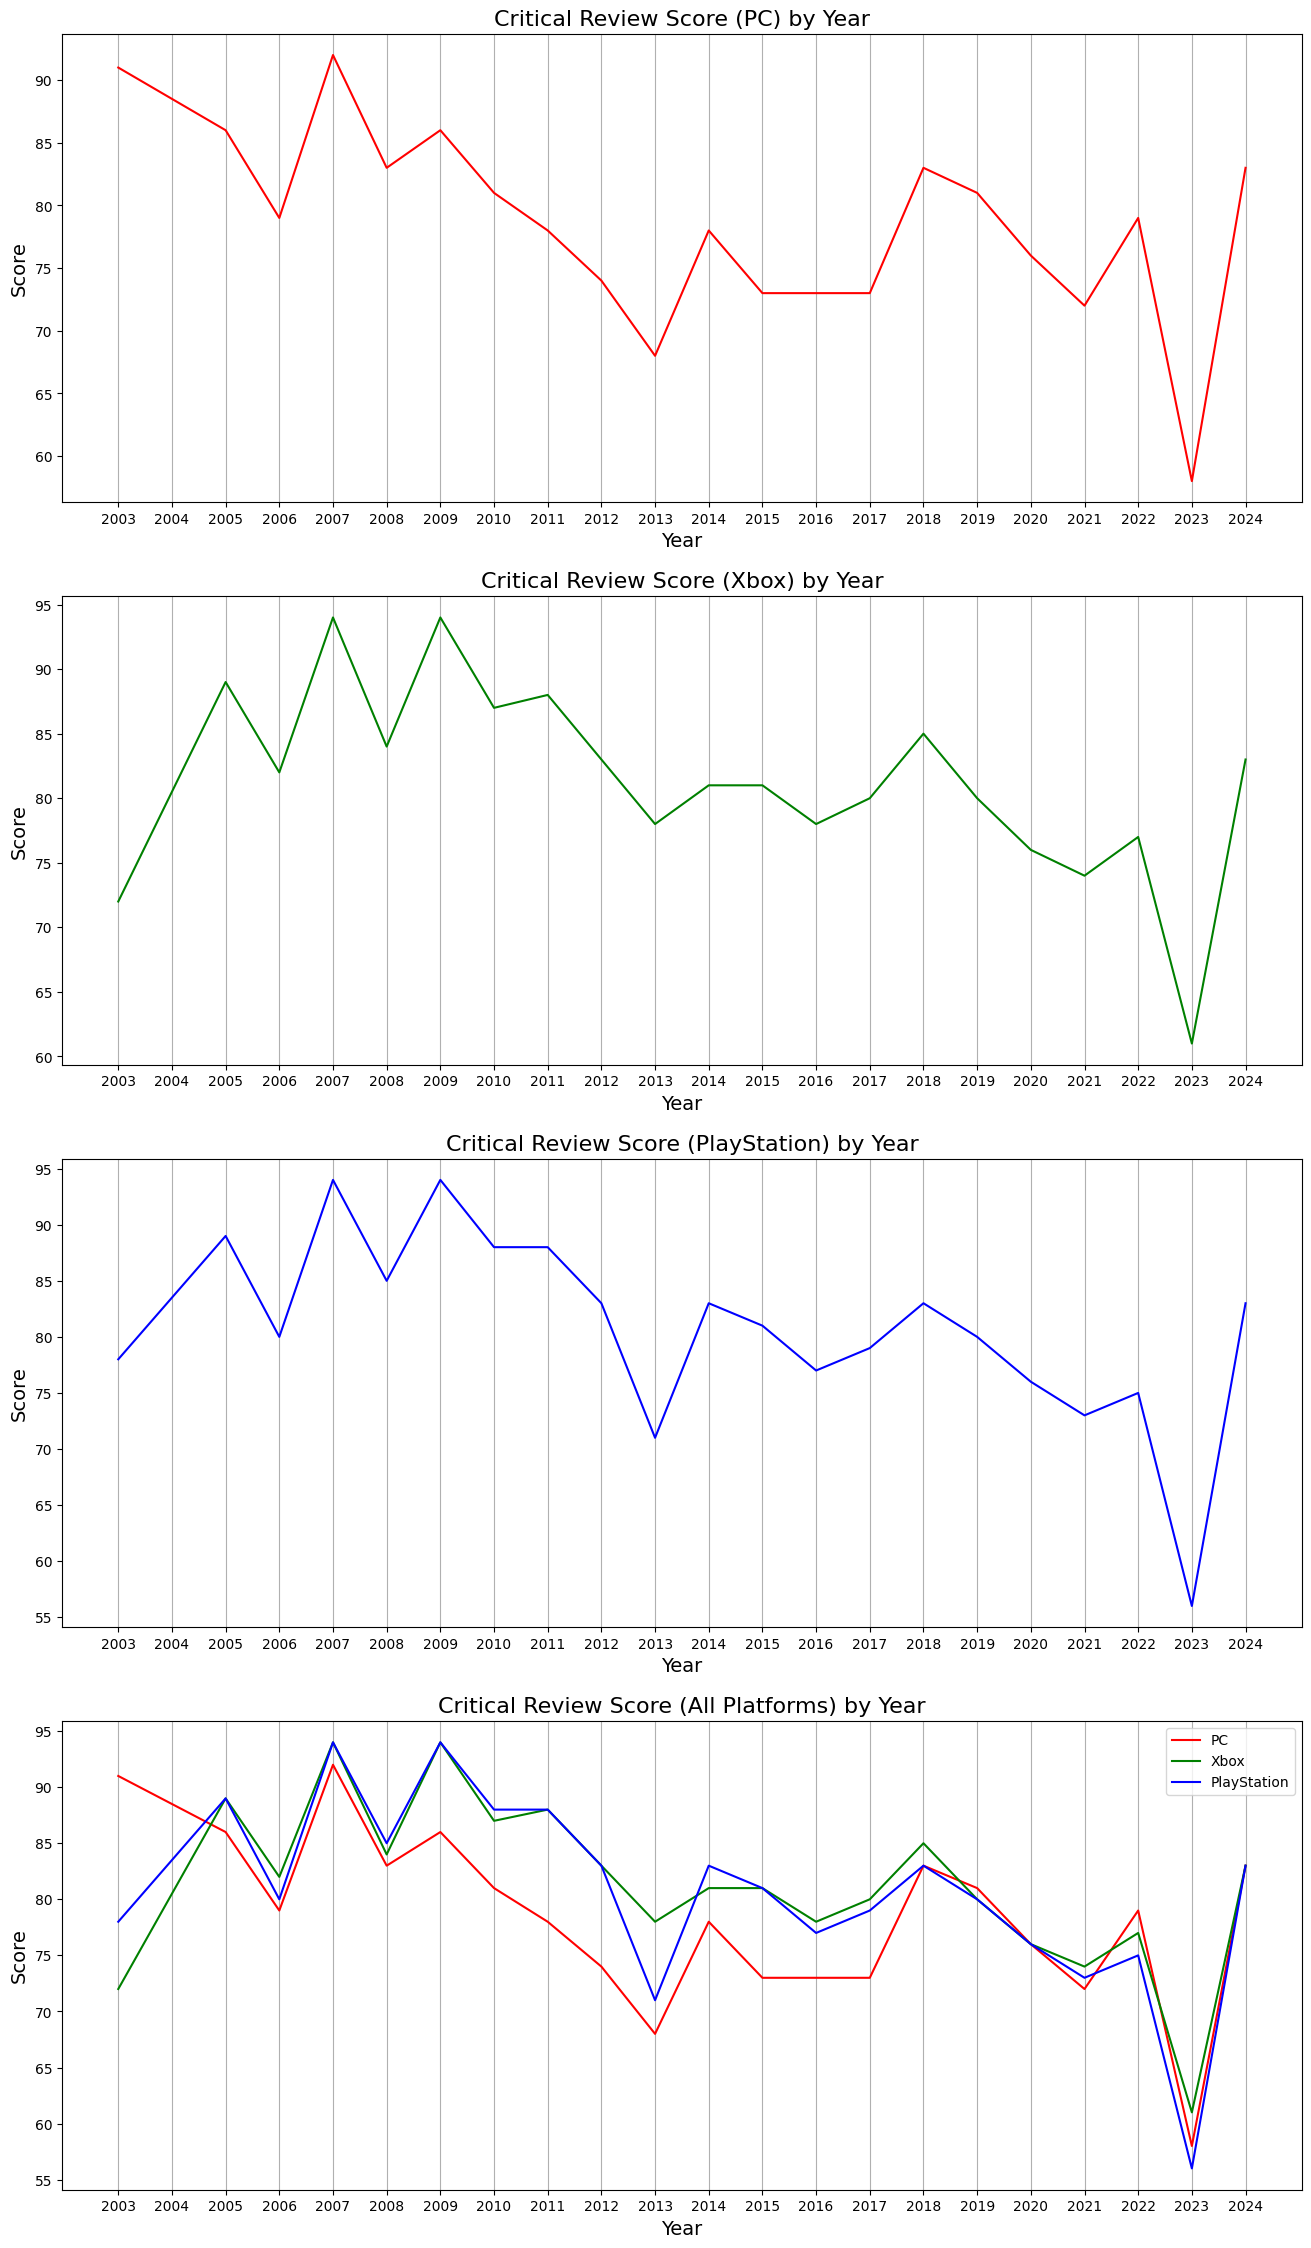

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# with 2004 lacking a series entry, this 'years' list helps visualisations look better
years = np.arange(2003, 2025)

# figure properties
fig, ax = plt.subplots(4, 1)
fig.set_size_inches([16, 28])

# PC Critical Score
ax[0].plot(df['Year'], df['PC Critic'], color = 'r')
ax[0].set_xlabel('Year', fontsize = 14)
ax[0].set_ylabel('Score', fontsize = 14)
ax[0].set_title('Critical Review Score (PC) by Year', fontsize = 16)
ax[0].set_xticks(years)
ax[0].grid(axis = 'x')

# Xbox Critical Score
ax[1].plot(df['Year'], df['Xbox Critic'], color = 'g')
ax[1].set_xlabel('Year', fontsize = 14)
ax[1].set_ylabel('Score', fontsize = 14)
ax[1].set_title('Critical Review Score (Xbox) by Year', fontsize = 16)
ax[1].set_xticks(years)
ax[1].grid(axis = 'x')

# PlayStation Critical Score
ax[2].plot(df['Year'], df['PlayStation Critic'], color = 'b')
ax[2].set_xlabel('Year', fontsize = 14)
ax[2].set_ylabel('Score', fontsize = 14)
ax[2].set_title('Critical Review Score (PlayStation) by Year', fontsize = 16)
ax[2].set_xticks(years)
ax[2].grid(axis = 'x')

# all platforms
ax[3].plot(df['Year'], df['PC Critic'], color = 'r', label = 'PC')
ax[3].plot(df['Year'], df['Xbox Critic'], color = 'g', label = 'Xbox')
ax[3].plot(df['Year'], df['PlayStation Critic'], color = 'b', label = 'PlayStation')
ax[3].set_xlabel('Year', fontsize = 14)
ax[3].set_ylabel('Score', fontsize = 14)
ax[3].set_title('Critical Review Score (All Platforms) by Year', fontsize = 16)
ax[3].legend(loc = 'upper right')
ax[3].set_xticks(years)
ax[3].grid(axis = 'x')

plt.show()

#### Summary:
- 2003 - 2009: all three platforms trend very closely together with the exception of Call of Duty (1) which probably suffered bad reviews on consoles as deveopers became familiar with developing for Xbox and PlayStation. PC review scores drop off with Modern Warfare 2.

- 2009 - 2013: Xbox and PlayStation scores still tied very close until 2013 (Ghosts) in which PlayStation has a major drop in score compared to Xbox. PC follows trend of falling scores, just with ~10 points less than console counterparts.

- 2013 - 2018: all three platform review scores slowly converge together again in 2018 with Black Ops 4

- 2018 - present: all three platform reviews are fairly equal since, indicating higher conformity to standards regardless of platform

#### User Scores

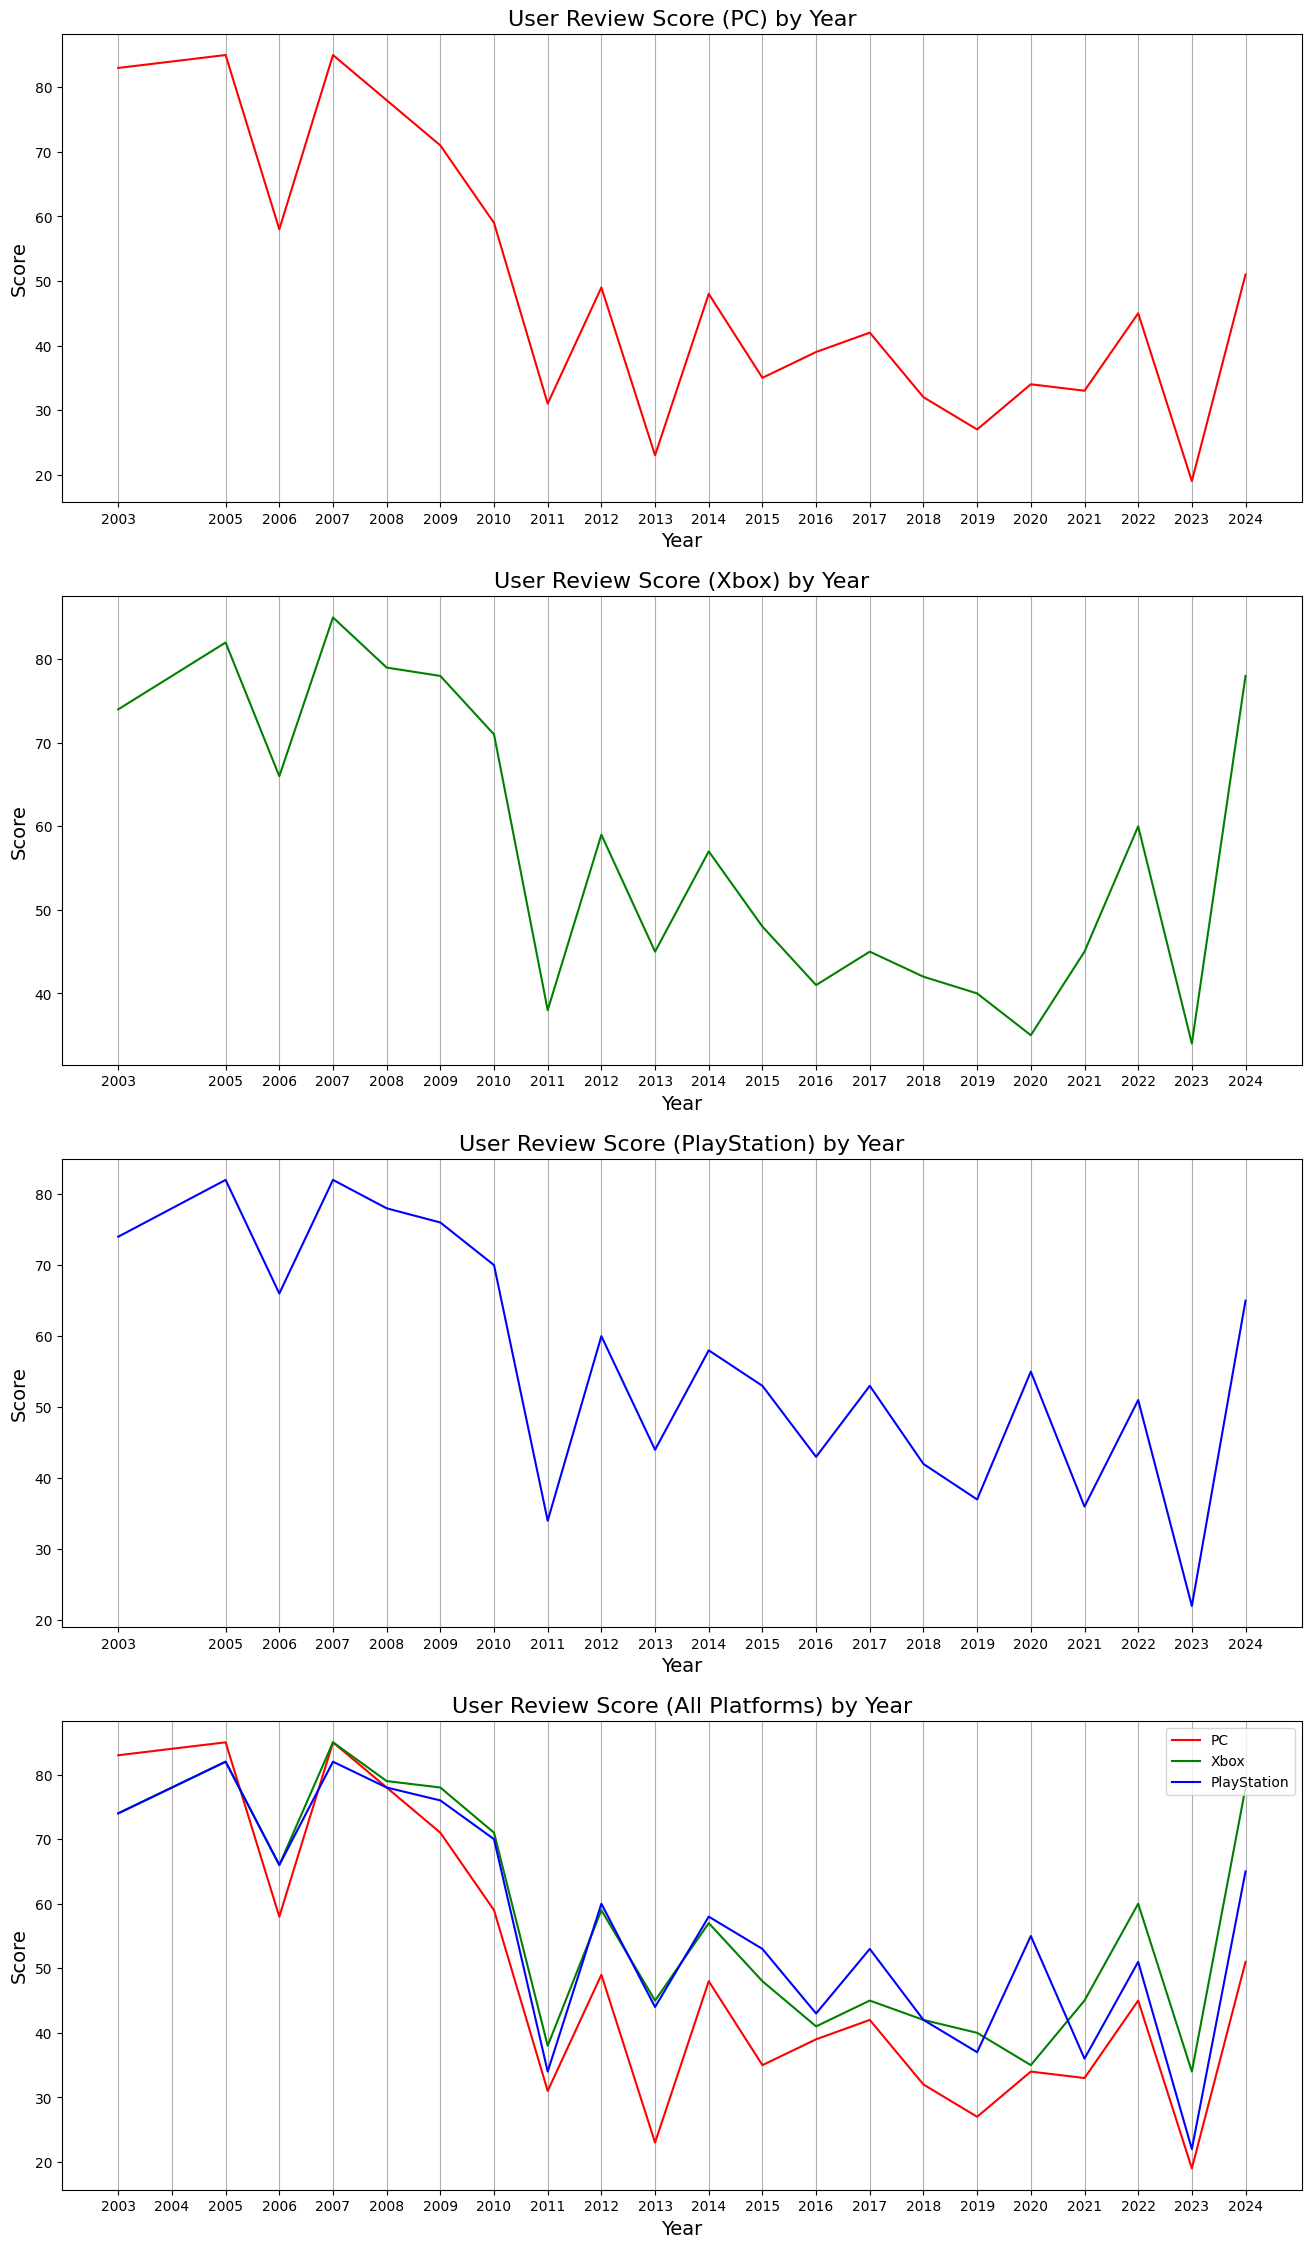

In [41]:
# figure properties
fig, ax = plt.subplots(4, 1)
fig.set_size_inches([16, 28])

# PC Critical Score
ax[0].plot(df['Year'], df['PC User'], color = 'r')
ax[0].set_xlabel('Year', fontsize = 14)
ax[0].set_ylabel('Score', fontsize = 14)
ax[0].set_title('User Review Score (PC) by Year', fontsize = 16)
ax[0].set_xticks(years)
ax[0].grid(axis = 'x')

# Xbox Critical Score
ax[1].plot(df['Year'], df['Xbox User'], color = 'g')
ax[1].set_xlabel('Year', fontsize = 14)
ax[1].set_ylabel('Score', fontsize = 14)
ax[1].set_title('User Review Score (Xbox) by Year', fontsize = 16)
ax[1].set_xticks(years)
ax[1].grid(axis = 'x')

# PlayStation Critical Score
ax[2].plot(df['Year'], df['PlayStation User'], color = 'b')
ax[2].set_xlabel('Year', fontsize = 14)
ax[2].set_ylabel('Score', fontsize = 14)
ax[2].set_title('User Review Score (PlayStation) by Year', fontsize = 16)
ax[2].set_xticks(years)
ax[2].grid(axis = 'x')

# all platforms
ax[3].plot(df['Year'], df['PC User'], color = 'r', label = 'PC')
ax[3].plot(df['Year'], df['Xbox User'], color = 'g', label = 'Xbox')
ax[3].plot(df['Year'], df['PlayStation User'], color = 'b', label = 'PlayStation')
ax[3].set_xlabel('Year', fontsize = 14)
ax[3].set_ylabel('Score', fontsize = 14)
ax[3].set_title('User Review Score (All Platforms) by Year', fontsize = 16)
ax[3].legend(loc = 'upper right')
ax[3].set_xticks(years)
ax[3].grid(axis = 'x')

plt.show()

#### Summary:
- 

- 

- 

- 

#### Critical Score vs. User Score

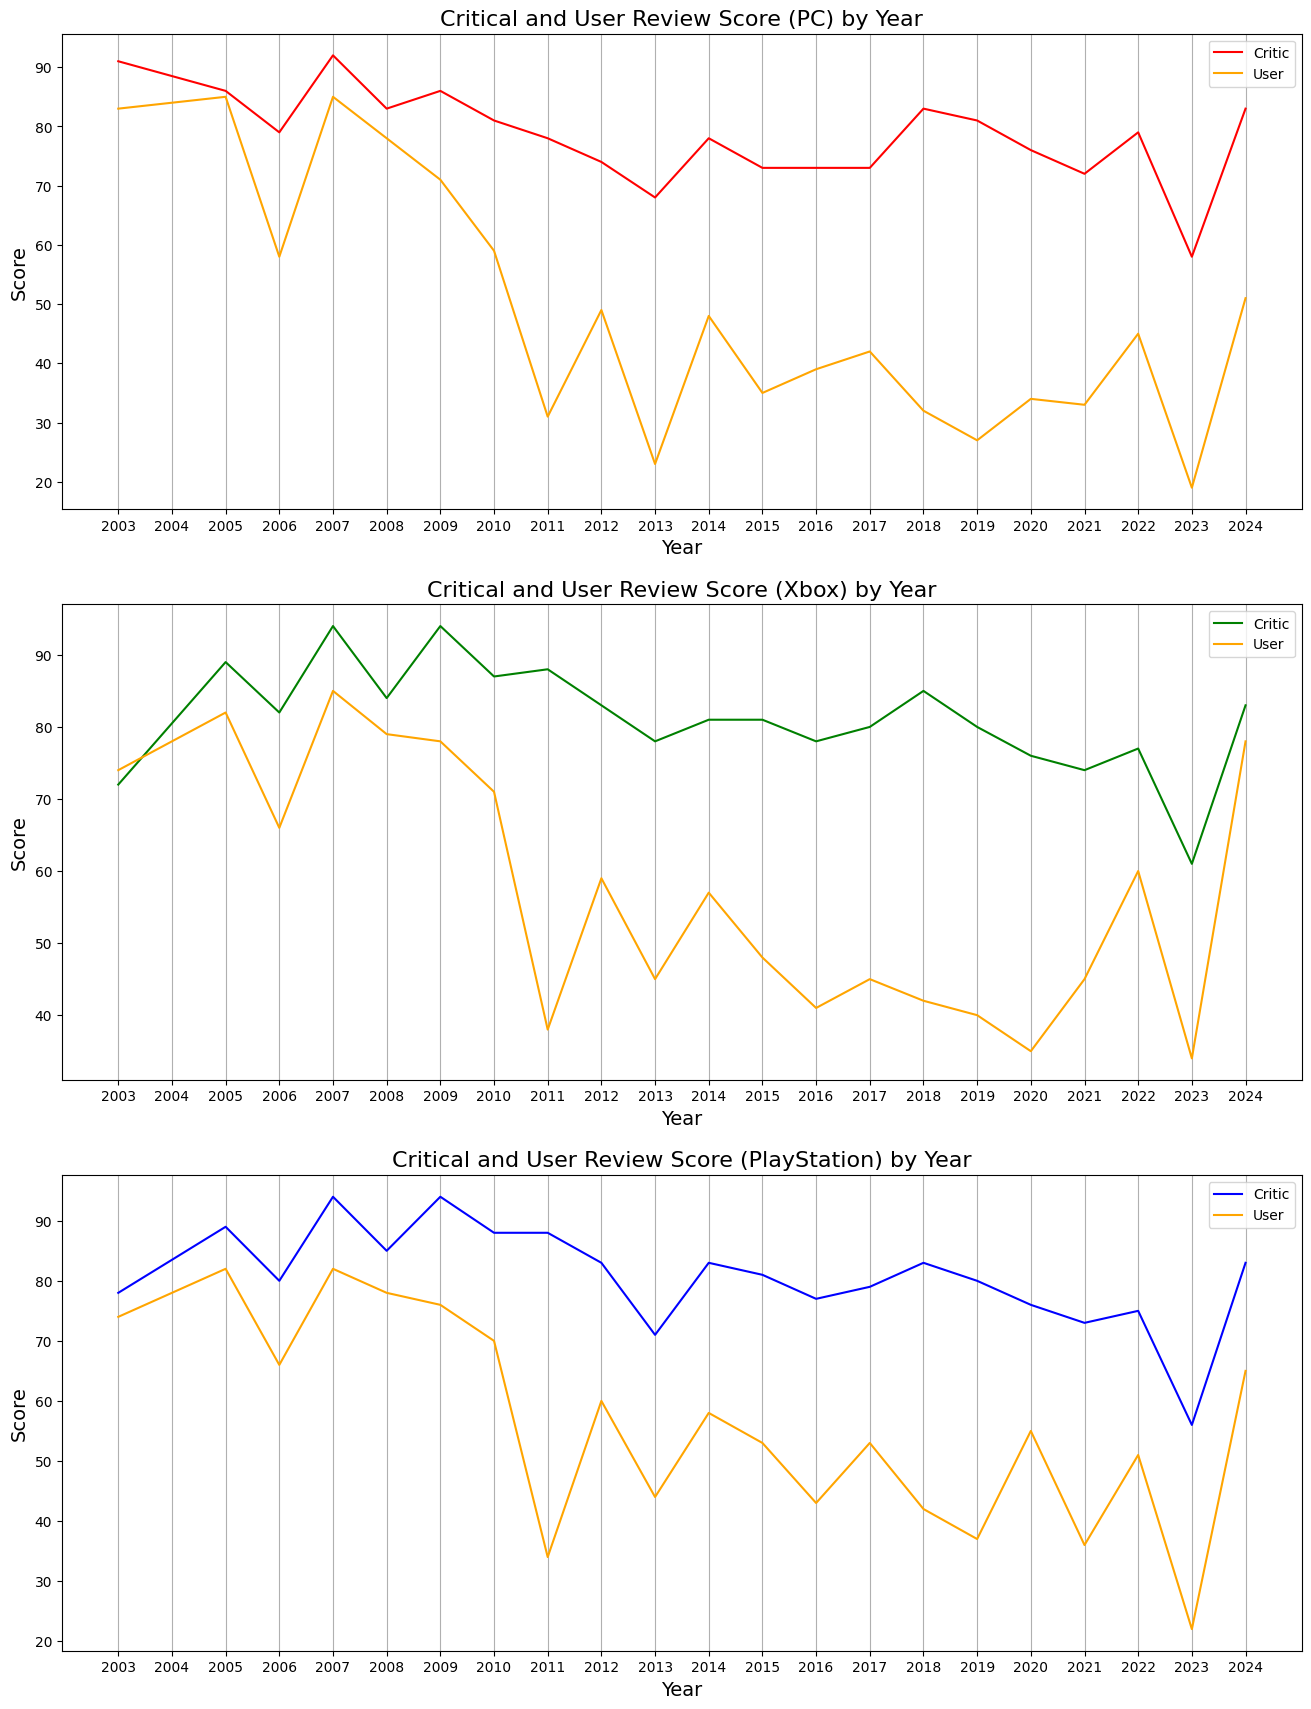

In [57]:
# figure properties
fig, ax = plt.subplots(3, 1)
fig.set_size_inches([16, 21])

# Critic vs User PC
ax[0].plot(df['Year'], df['PC Critic'], color = 'r', label = 'Critic')
ax[0].plot(df['Year'], df['PC User'], color = 'orange', label = 'User')
ax[0].set_xlabel('Year', fontsize = 14)
ax[0].set_ylabel('Score', fontsize = 14)
ax[0].set_title('Critical and User Review Score (PC) by Year', fontsize = 16)
ax[0].legend(loc = 'upper right')
ax[0].set_xticks(years)
ax[0].grid(axis = 'x')

# Critic vs User Xbox
ax[1].plot(df['Year'], df['Xbox Critic'], color = 'g', label = 'Critic')
ax[1].plot(df['Year'], df['Xbox User'], color = 'orange', label = 'User')
ax[1].set_xlabel('Year', fontsize = 14)
ax[1].set_ylabel('Score', fontsize = 14)
ax[1].set_title('Critical and User Review Score (Xbox) by Year', fontsize = 16)
ax[1].legend(loc = 'upper right')
ax[1].set_xticks(years)
ax[1].grid(axis = 'x')

# Critic vs User PlayStation
ax[2].plot(df['Year'], df['PlayStation Critic'], color = 'b', label = 'Critic')
ax[2].plot(df['Year'], df['PlayStation User'], color = 'orange', label = 'User')
ax[2].set_xlabel('Year', fontsize = 14)
ax[2].set_ylabel('Score', fontsize = 14)
ax[2].set_title('Critical and User Review Score (PlayStation) by Year', fontsize = 16)
ax[2].legend(loc = 'upper right')
ax[2].set_xticks(years)
ax[2].grid(axis = 'x')

plt.show()

So, it looks like users generally agree with critical review scores up until 2009 where the difference in scores clearly begins to increase. Let's do a bit more coding and get the numerical differences.

In [15]:
# new df with review differences
df_with_diffs = df.copy()

# calculate differences in review scores
df_with_diffs['PC Diff'] = df_with_diffs['PC Critic'] - df_with_diffs['PC User']
df_with_diffs['Xbox Diff'] = df_with_diffs['Xbox Critic'] - df_with_diffs['Xbox User']
df_with_diffs['PlayStation Diff'] = df_with_diffs['PlayStation Critic'] - df_with_diffs['PlayStation User']

df_with_diffs

,Year,Game,PC Critic,PC User,Xbox Critic,Xbox User,PlayStation Critic,PlayStation User,PC Diff,Xbox Diff,PlayStation Diff
0,2003,Call of Duty,91.0,83.0,72.0,74.0,78.0,74.0,8.0,-2.0,4.0
1,2005,Call of Duty 2,86.0,85.0,89.0,82.0,89.0,82.0,1.0,7.0,7.0
2,2006,Call of Duty 3,79.0,58.0,82.0,66.0,80.0,66.0,21.0,16.0,14.0
3,2007,Call of Duty 4: Modern Warfare,92.0,85.0,94.0,85.0,94.0,82.0,7.0,9.0,12.0
4,2008,Call of Duty: World at War,83.0,78.0,84.0,79.0,85.0,78.0,5.0,5.0,7.0
5,2009,Call of Duty: Modern Warfare 2,86.0,71.0,94.0,78.0,94.0,76.0,15.0,16.0,18.0
6,2010,Call of Duty: Black Ops,81.0,59.0,87.0,71.0,88.0,70.0,22.0,16.0,18.0
7,2011,Call of Duty: Modern Warfare 3,78.0,31.0,88.0,38.0,88.0,34.0,47.0,50.0,54.0
8,2012,Call of Duty: Black Ops II,74.0,49.0,83.0,59.0,83.0,60.0,25.0,24.0,23.0
9,2013,Call of Duty: Ghosts,68.0,23.0,78.0,45.0,71.0,44.0,45.0,33.0,27.0


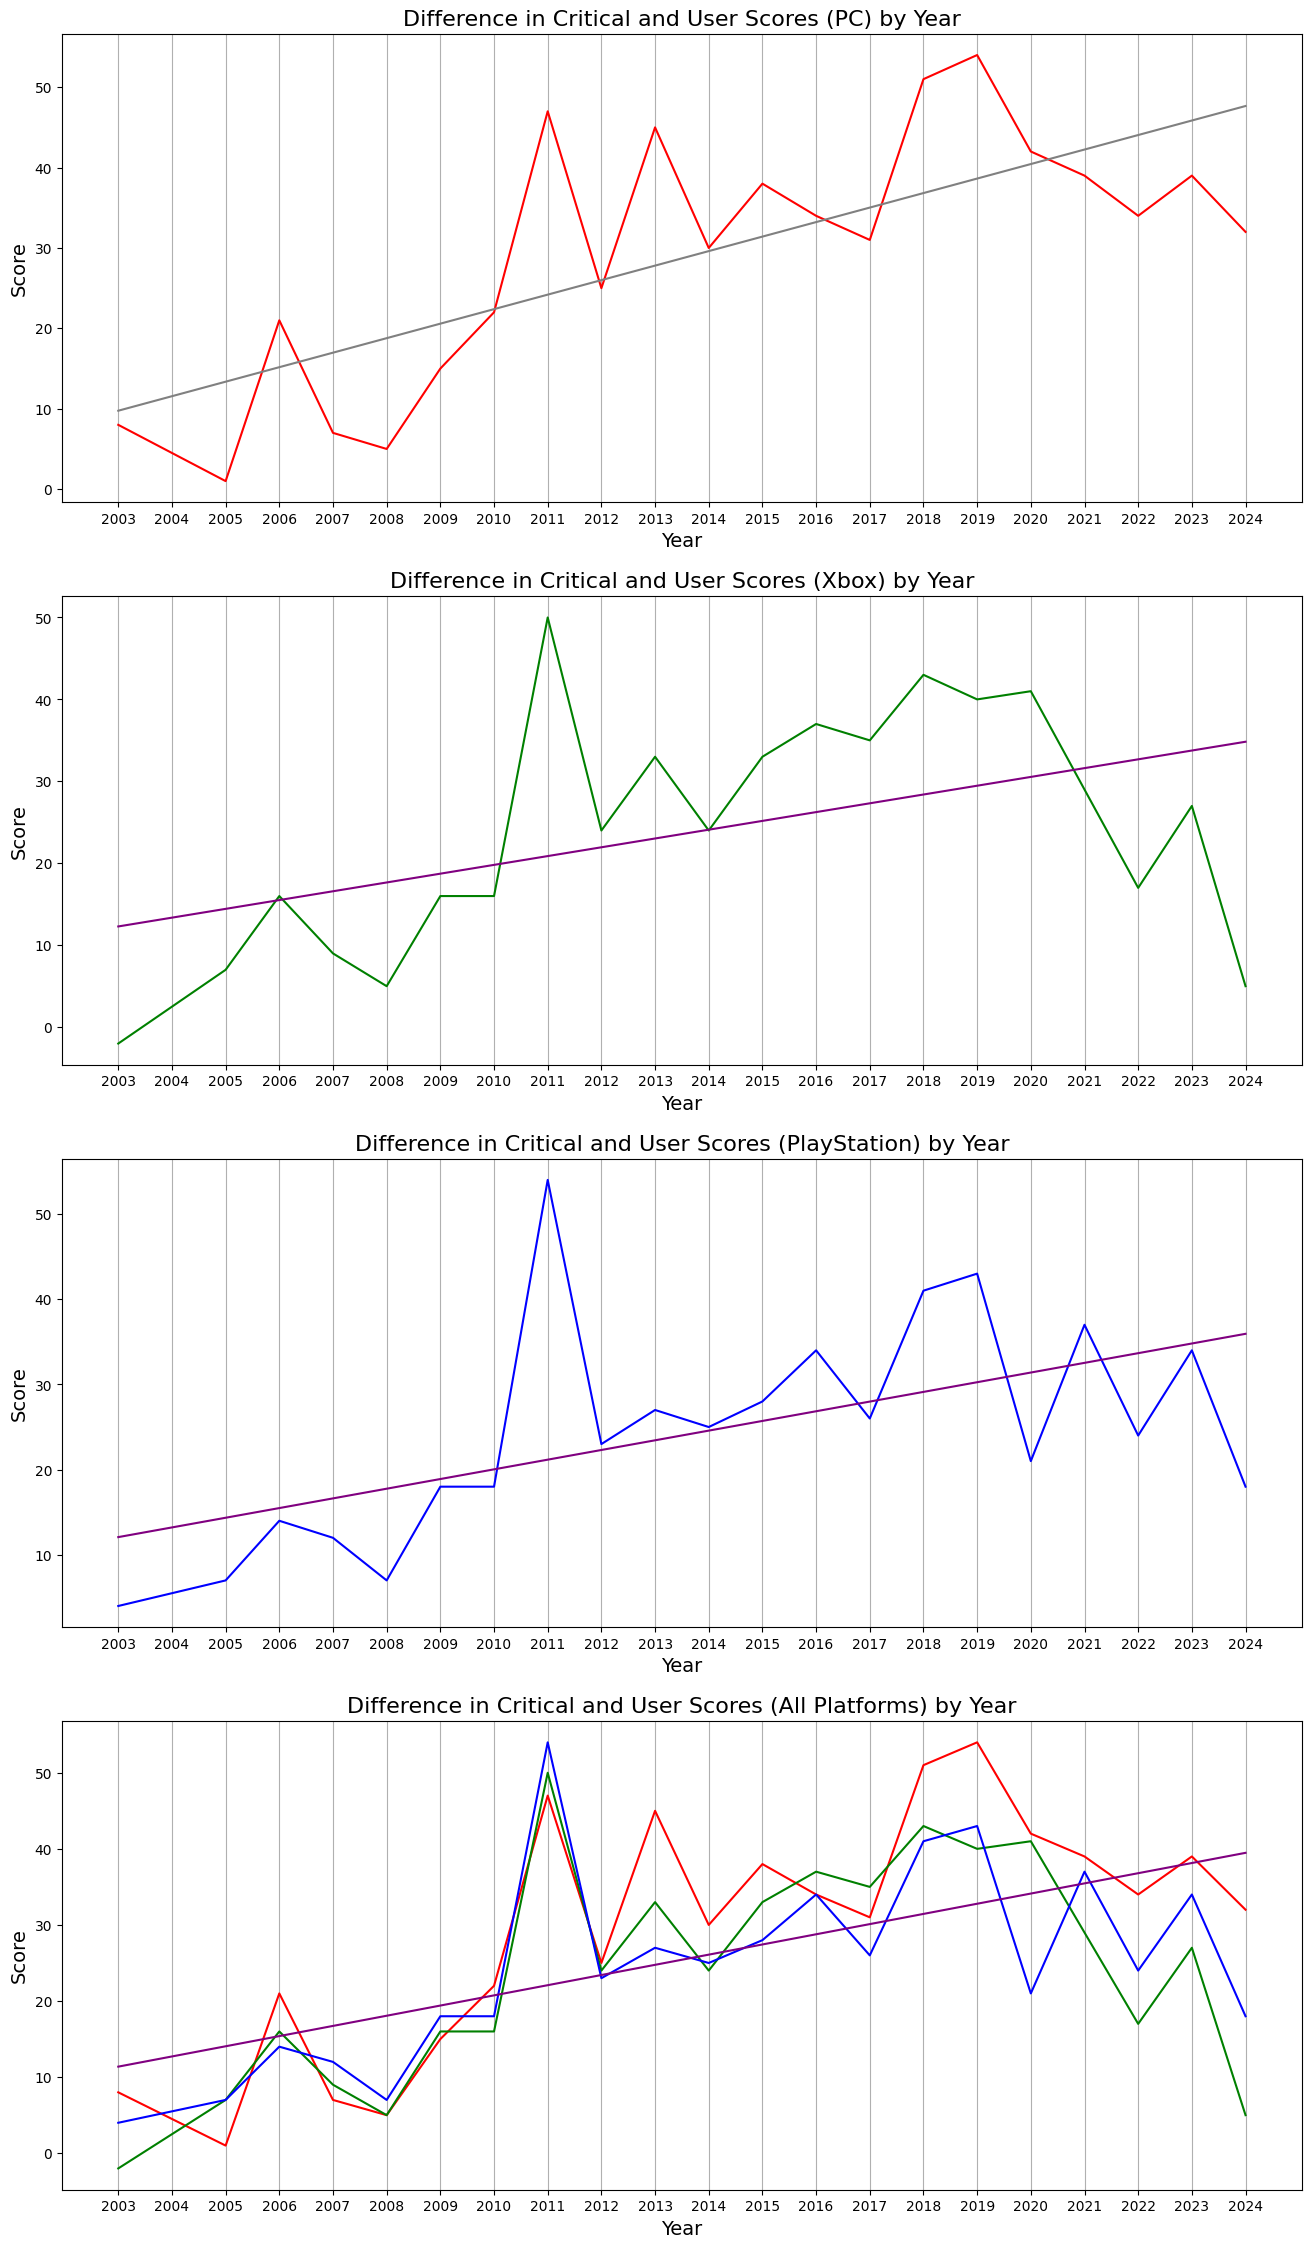

In [67]:
# figure properties
fig, ax = plt.subplots(4, 1)
fig.set_size_inches([16, 28])

# PC review score differences
ax[0].plot(df_with_diffs['Year'], df_with_diffs['PC Diff'], color = 'r')
ax[0].set_xlabel('Year', fontsize = 14)
ax[0].set_ylabel('Score', fontsize = 14)
ax[0].set_title('Difference in Critical and User Scores (PC) by Year', fontsize = 16)
ax[0].set_xticks(years)
ax[0].grid(axis = 'x')
# trendline
z = np.polyfit(df_with_diffs['Year'], df_with_diffs['PC Diff'], 1)
p = np.poly1d(z)
ax[0].plot(df_with_diffs['Year'], p(df_with_diffs['Year']), color = 'purple')

# Xbox review score differences
ax[1].plot(df_with_diffs['Year'], df_with_diffs['Xbox Diff'], color = 'g')
ax[1].set_xlabel('Year', fontsize = 14)
ax[1].set_ylabel('Score', fontsize = 14)
ax[1].set_title('Difference in Critical and User Scores (Xbox) by Year', fontsize = 16)
ax[1].set_xticks(years)
ax[1].grid(axis = 'x')
# trendline
z = np.polyfit(df_with_diffs['Year'], df_with_diffs['Xbox Diff'], 1)
p = np.poly1d(z)
ax[1].plot(df_with_diffs['Year'], p(df_with_diffs['Year']), color = 'purple')

# PlayStation review score differences
ax[2].plot(df_with_diffs['Year'], df_with_diffs['PlayStation Diff'], color = 'b')
ax[2].set_xlabel('Year', fontsize = 14)
ax[2].set_ylabel('Score', fontsize = 14)
ax[2].set_title('Difference in Critical and User Scores (PlayStation) by Year', fontsize = 16)
ax[2].set_xticks(years)
ax[2].grid(axis = 'x')
# trendline
z = np.polyfit(df_with_diffs['Year'], df_with_diffs['PlayStation Diff'], 1)
p = np.poly1d(z)
ax[2].plot(df_with_diffs['Year'], p(df_with_diffs['Year']), color = 'purple')

# review score difference (all platforms)
ax[3].plot(df_with_diffs['Year'], df_with_diffs['PC Diff'], color = 'r')
ax[3].plot(df_with_diffs['Year'], df_with_diffs['Xbox Diff'], color = 'g')
ax[3].plot(df_with_diffs['Year'], df_with_diffs['PlayStation Diff'], color = 'b')
ax[3].set_xlabel('Year', fontsize = 14)
ax[3].set_ylabel('Score', fontsize = 14)
ax[3].set_title('Difference in Critical and User Scores (All Platforms) by Year', fontsize = 16)
ax[3].set_xticks(years)
ax[3].grid(axis = 'x')
# trendline
z = np.polyfit(df_with_diffs['Year'], (df_with_diffs['PC Diff'] + df_with_diffs['Xbox Diff'] + df_with_diffs['PlayStation Diff']) / 3, 1)
p = np.poly1d(z)
ax[3].plot(df_with_diffs['Year'], p(df_with_diffs['Year']), color = 'purple')

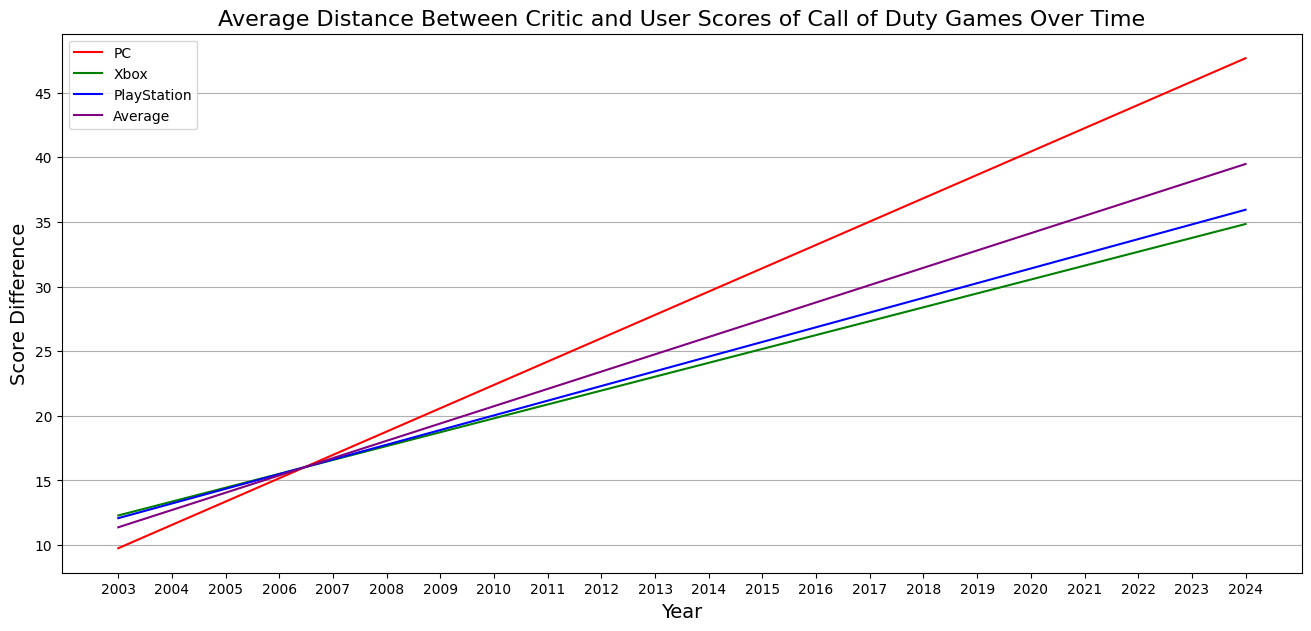

In [69]:
plt.figure(figsize = (16, 7))

# trendlines
z = np.polyfit(df_with_diffs['Year'], df_with_diffs['PC Diff'], 1)
p = np.poly1d(z)
plt.plot(df_with_diffs['Year'], p(df_with_diffs['Year']), color = 'r', label = 'PC')
z = np.polyfit(df_with_diffs['Year'], df_with_diffs['Xbox Diff'], 1)
p = np.poly1d(z)
plt.plot(df_with_diffs['Year'], p(df_with_diffs['Year']), color = 'g', label = 'Xbox')
z = np.polyfit(df_with_diffs['Year'], df_with_diffs['PlayStation Diff'], 1)
p = np.poly1d(z)
plt.plot(df_with_diffs['Year'], p(df_with_diffs['Year']), color = 'b', label = 'PlayStation')
z = np.polyfit(df_with_diffs['Year'], (df_with_diffs['PC Diff'] + df_with_diffs['Xbox Diff'] + df_with_diffs['PlayStation Diff']) / 3, 1)
p = np.poly1d(z)
plt.plot(df_with_diffs['Year'], p(df_with_diffs['Year']), color = 'purple', label = 'Average')

plt.xlabel('Year', fontsize = 14)
plt.ylabel('Score Difference', fontsize = 14)
plt.title('Average Distance Between Critic and User Scores of Call of Duty Games Over Time', fontsize = 16)
plt.legend(loc = 'upper left')
plt.grid(axis = 'y')
plt.xticks(years)

plt.show()

The trendlines in the above graphs confirms the hypothesis and shows that the gap between critical reviews and user reviews is widening. There have been improvements in recent years as the data points begin to trend back down again since 2019 for PC and PlayStation, and 2020 for Xbox. 

As of 2024, the average score difference is around 48 points for PC, and 35 points for PlayStation and Xbox (which is hardly surprising). Call of Duty: Modern Warfare 3, released in 2011, was the most contentious release in the series. On average the difference in review scores is about 50!

### Key Takeaways
So my hypothesis has been proved correct: at least as far as Call of Duty is concerned, critical reviews have been less representative of the general player base as time has moved on. Since 2010, the gap between critical and user consensus has widened disproportionately.


#### Next Steps:
I think it would be good to have a look at a broader dataset of games across a vaster period of time. I reckon I will follow this analysis up with a second, more rigorous analysis involving a greater range of games dating back to the 1980s or 1990s.